# Regresión logística: Entrenamiento y predicciones
M2U5 - Ejercicio 4

## ¿Qué vamos a hacer?
- Crear un dataset sintético para regresión logística
- Preprocesar los datos
- Implementar el entrenamiento del modelo por gradient descent
- Comprobar el entrenamiento representando la evolución de la función de coste


## Instrucciones
Una vez implementada la función de coste, vamos a entrenar un modelo de regresión logística por gradient descent, comprobando nuestro entrenamiento, evaluándolo sobre un subset de test y finalmente realizando predicciones sobre el mismo.

En esta ocasión trabajaremos con una regresión logística binaria, mientras que en otros ejercicios plantearemos una clasificación multiclase.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import statsmodels.api as sm

## Crear un dataset sintético para regresión logística

Vamos a crear un dataset sintético de 2 clases únicamente (0 y 1) para comprobar esta implementación de un modelo de clasificación binaria, entrenado completamente, paso a paso.

Para ello, crea un dataset sintético para regresión logística con término de bias y error de forma manual (para tener disponible *Theta_verd*) con el código que has usado en el ejercicio anterior:

In [2]:
# TODO: Genera un dataset sintético con término de bias y error de forma manual
m = 100
n = 1

# Genera un array 2D m x n con valores aleatorios entre -1 y 1
# Insértale el término de bias como una primera columna de 1s
X = np.random.uniform(-1, 1, (m,n))
bias = np.ones((m, 1))
X = np.concatenate([bias, X], axis=1)

# Genera un array de theta de n + 1 valores aleatorios entre [0, 1)
Theta_verd = np.random.random(n + 1)

# Calcula Y en función de X y Theta_verd
# Transforma Y a valores de 1. y 0. (float) cuando Y >= 0.0
# Con una probabilidad como término de error, itera sobre Y y modifica la clase asignada a la contraria, 1. a 0. y 0. a 1.
error = 0.15

Y = X @ Theta_verd
Y = (Y >= 0).astype(float)
flip = np.random.rand(m) < error
Y[flip] = 1 - Y[flip]

# Muestra Theta y sus dimensiones
print('Theta a estimar y sus dimensiones:')
print(Theta_verd)
print(Theta_verd.shape)
print()

# Primeras 10 filas de X y Y
print('Primeras 10 filas de X e Y:')
print('X[:10]:\n', X[:10])
print('Y[:10]:\n', Y[:10])
print()

# Dimensiones de X e Y
print('Dimensiones de X e Y:')
print('X:', X.shape)
print('Y:', Y.shape)

Theta a estimar y sus dimensiones:
[0.29857882 0.52622526]
(2,)

Primeras 10 filas de X e Y:
X[:10]:
 [[ 1.         -0.97523545]
 [ 1.          0.80342622]
 [ 1.         -0.46919425]
 [ 1.          0.34062971]
 [ 1.         -0.80902136]
 [ 1.          0.86101039]
 [ 1.         -0.1834562 ]
 [ 1.          0.17203845]
 [ 1.         -0.82258293]
 [ 1.         -0.76325624]]
Y[:10]:
 [0. 1. 1. 1. 0. 1. 1. 1. 0. 0.]

Dimensiones de X e Y:
X: (100, 2)
Y: (100,)


## Implementar la función de activación sigmoide

Copia tu celda con la función sigmoide:

In [3]:
# TODO: Implementa la función sigmoide

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


## Preprocesar los datos

Al igual que hacíamos para la regresión lineal, vamos a preprocesar los datos completamente, siguiendo los 3 pasos habituales:

- Reordenarlos aleatoriamente.
- Normalizarlos.
- Dividirlos en subsets de entrenamiento y test.

Puedes hacerlo manualmente o con las funciones auxiliares de Scikit-learn.

### Reordenar el dataset aleatoriamente

Reordena los datos del dataset *X* e *Y*:

In [4]:
# TODO: Reordena aleatoriamente el dataset

print('Primeras 10 filas y 5 columnas de X e Y:')
print(X[:10])
print(Y[:10])

X, Y = shuffle(X, Y, random_state=42)

print('\nPrimeras 10 filas y 5 columnas de X e Y:')
print(X[:10])
print(Y[:10])

print('\nDimensiones de X e Y:')
print('X:', X.shape)
print('Y:', Y.shape)

Primeras 10 filas y 5 columnas de X e Y:
[[ 1.         -0.97523545]
 [ 1.          0.80342622]
 [ 1.         -0.46919425]
 [ 1.          0.34062971]
 [ 1.         -0.80902136]
 [ 1.          0.86101039]
 [ 1.         -0.1834562 ]
 [ 1.          0.17203845]
 [ 1.         -0.82258293]
 [ 1.         -0.76325624]]
[0. 1. 1. 1. 0. 1. 1. 1. 0. 0.]

Primeras 10 filas y 5 columnas de X e Y:
[[ 1.         -0.35975414]
 [ 1.         -0.32318924]
 [ 1.         -0.88413717]
 [ 1.         -0.03378349]
 [ 1.         -0.65438299]
 [ 1.         -0.90376585]
 [ 1.          0.39640586]
 [ 1.         -0.91914391]
 [ 1.          0.01389972]
 [ 1.         -0.97523545]]
[1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]

Dimensiones de X e Y:
X: (100, 2)
Y: (100,)


### Normalizar el dataset

Implementa la función de normalización y normaliza el dataset de ejemplos *X*:

In [5]:
# TODO: Normaliza el dataset con una función de normalización

# Copia tu función de normalización utilizada en la unidad de regresión lineal
def normalize(x, mu, std):
    return (x - mu) / std

# Halla la media y la desviación típica de las características de X (columnas), excepto la primera (bias)
mu = X[:, 1:].mean(axis=0)
std = X[:, 1:].std(axis=0)

print('X original:')
print(X)
print(X.shape)

print('Media y desviación típica de las características:')
print(mu)
print(mu.shape)
print(std)
print(std.shape)

print('X normalizada:')
X_norm = np.copy(X)
X_norm[:, 1:] = normalize(X[:, 1:], mu, std)
print(X_norm)
print(X_norm.shape)

X original:
[[ 1.         -0.35975414]
 [ 1.         -0.32318924]
 [ 1.         -0.88413717]
 [ 1.         -0.03378349]
 [ 1.         -0.65438299]
 [ 1.         -0.90376585]
 [ 1.          0.39640586]
 [ 1.         -0.91914391]
 [ 1.          0.01389972]
 [ 1.         -0.97523545]
 [ 1.          0.47364998]
 [ 1.         -0.5867646 ]
 [ 1.         -0.34502673]
 [ 1.          0.94401065]
 [ 1.          0.86191303]
 [ 1.         -0.80902136]
 [ 1.         -0.25718655]
 [ 1.         -0.45285477]
 [ 1.         -0.56174016]
 [ 1.         -0.53683888]
 [ 1.          0.49631054]
 [ 1.          0.51672362]
 [ 1.         -0.53745252]
 [ 1.          0.05978875]
 [ 1.         -0.92339967]
 [ 1.         -0.99367251]
 [ 1.          0.50442707]
 [ 1.         -0.36973251]
 [ 1.         -0.76325624]
 [ 1.         -0.20985004]
 [ 1.          0.75670237]
 [ 1.         -0.11773638]
 [ 1.         -0.11804142]
 [ 1.          0.46384453]
 [ 1.         -0.34064834]
 [ 1.          0.86101039]
 [ 1.         -0

### Dividir el dataset en subsets de entrenamiento y test

Divide el dataset de *X* e *Y* en 2 subsets con el ratio de 70%/30%.

Si tu nº de ejemplos es mucho más alto o bajo, siempre puedes modificar este ratio más adecuado.

In [6]:
# TODO: Divide el dataset X e Y en los 2 subsets según el ratio indicado

# Ratio de train/test
ratio = [70, 30]
print('Ratio:\n', ratio, ratio[0] + ratio[1])

# Índice de corte (70% de los datos para entrenamiento)
r = round(ratio[0] / sum(ratio) * X.shape[0])
print('Índice de corte:\n', r)

# Divide el dataset usando slicing
X_train, X_test = X[:r], X[r:]
Y_train, Y_test = Y[:r], Y[r:]

print('Tamaños de los subsets:')
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


Ratio:
 [70, 30] 100
Índice de corte:
 70
Tamaños de los subsets:
(70, 2)
(70,)
(30, 2)
(30,)


## Entrenar un modelo inicial sobre el subset de entrenamiento

Al igual que hacíamos en ejercicios anteriores, vamos a entrenar un modelo inicial para comprobar que nuestra implementación y el dataset trabajan correctamente, y posteriormente podremos entrenar un modelo con validación sin problema.

Para ello, sigue los mismos pasos que seguiste para la regresión lineal:
- Entrena un modelo inicial sin implementar la regularización.
- Representa el histórico de la función de coste para comprobar su evolución.
- Si es necesario, modifica cualquier parámetro y reentrena el modelo. Usarás dichos parámetros en siguientes puntos.

Copia las celdas de ejercicios anteriores donde implementabas la función de coste en regresión logística, el gradient descent sin regularizar para regresión lineal y la celda donde entrenabas el modelo de regresión, y modifícalas para el caso de la regresión logística.

Recuerda las funciones de descenso de gradiente para regresión logística:

$$ Y = h_\Theta(x) = g(X \times \Theta^T) $$
$$ \theta_j := \theta_j - \alpha [\frac{1}{m} \sum_{i=0}^{m}(h_\theta (x^i) - y^i) x_j^i] $$

In [7]:
# TODO: Copia la celda con la función de coste
def cost_function_logistic(X, Y, theta):
    m = X.shape[0]
    theta = theta.reshape(-1, 1)
    Y = Y.reshape(-1, 1)

    h = sigmoid(np.matmul(X, theta))  # predicciones

    J = -(1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))

    return float(J)

In [8]:
# TODO: Copia la celda con la función de descenso de gradiente sin regularizar para regresión lineal y adáptala para regresión logística
def gradient_descent_logistic(X, Y, theta, alpha, e=1e-6, iter_=1000):
    iter_ = int(iter_)
    j_hist = []
    m, n = X.shape

    for k in range(iter_):
        h = sigmoid(np.matmul(X, theta.reshape(-1,1)))
        grad = (1/m) * np.matmul(X.T, (h - Y.reshape(-1,1)))
        theta = theta - alpha * grad.flatten()

        cost = cost_function_logistic(X, Y, theta)
        j_hist.append(cost)

        if k > 0 and abs(j_hist[-1] - j_hist[-2]) < e:
            print(f'Convergió en la iteración {k}')
            break
    else:
        print('Número máximo de iteraciones alcanzado')

    return j_hist, theta

In [9]:
modelo = sm.Logit(endog=Y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.545555
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   70
Model:                          Logit   Df Residuals:                       68
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.1514
Time:                        20:36:17   Log-Likelihood:                -38.189
converged:                       True   LL-Null:                       -45.004
Covariance Type:            nonrobust   LLR p-value:                 0.0002226
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0651      0.331      3.222      0.001       0.417       1.713
x1             1.8547      0.

In [10]:
# TODO: Copia la celda donde entrenamos el modelo
# Entrena tu modelo sobre el subset de entrenamiento sin regularizar

# Inicializar theta con ceros (n características)
theta_init = np.zeros(X_train.shape[1])

# Parámetro de aprendizaje
alpha = 0.01

# Entrenar el modelo usando descenso de gradiente logístico
j_hist, theta_final = gradient_descent_logistic(X_train, Y_train, theta_init, alpha, e=1e-6, iter_=10000)

# Mostrar resultados
print("Theta final:", theta_final)
print("Coste final:", j_hist[-1])

Convergió en la iteración 4506
Theta final: [0.97892258 1.6300545 ]
Coste final: 0.5467329752339883


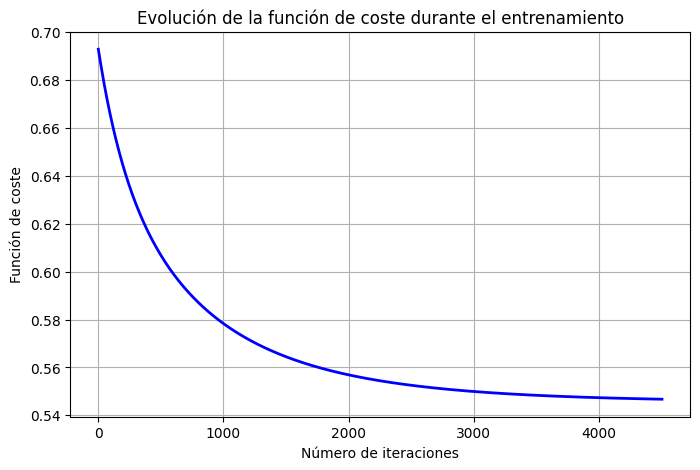

In [11]:
# TODO: Representa la evolución de la función de coste vs el nº de iteraciones

plt.figure(figsize=(8,5))
plt.plot(j_hist, color='blue', linewidth=2)
plt.xlabel("Número de iteraciones")
plt.ylabel("Función de coste")
plt.title("Evolución de la función de coste durante el entrenamiento")
plt.grid(True)
plt.show()


Comprueba tu implementación en estas circunstancias:
1. Usando *Theta_verd*, el coste final debe ser prácticamente 0 y converger en un par de iteraciones.
1. Según los valores de *theta* se alejen de *Theta_verd*, debe necesitar más iteraciones y la *theta_final* debe ser muy similar a la *Theta_verd*.

Para ello recuerda que puedes modificar los valores de las celdas y reejecutarlas.

Anota tus experimentos y resultados en esta celda (en Markdown o código):
1. Experimento 1
1. Experimento 2

Convergió en la iteración 3948
Theta final: [0.97887239 1.63000844]
Coste final: 0.5467335811326098


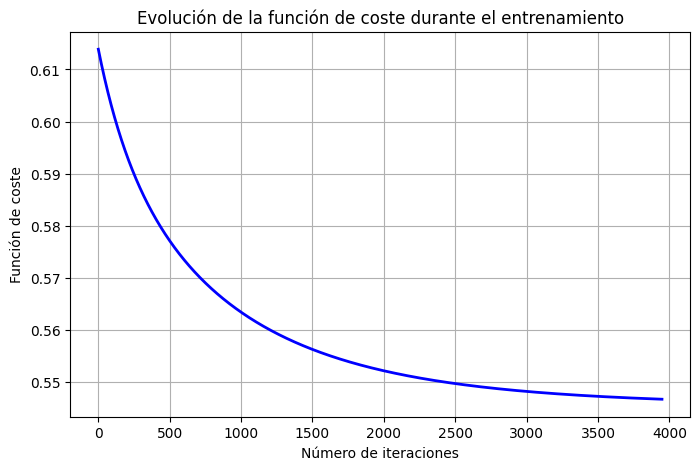

In [12]:
# Experimento 1

alpha = 0.01

j_hist, Theta_verd = gradient_descent_logistic(X_train, Y_train, Theta_verd, alpha, e=1e-6, iter_=10000)

print("Theta final:", Theta_verd)
print("Coste final:", j_hist[-1])

plt.figure(figsize=(8,5))
plt.plot(j_hist, color='blue', linewidth=2)
plt.xlabel("Número de iteraciones")
plt.ylabel("Función de coste")
plt.title("Evolución de la función de coste durante el entrenamiento")
plt.grid(True)
plt.show()


Convergió en la iteración 1400
Theta final: [1.14592807 1.9358133 ]
Coste final: 0.5459732440155967
Número máximo de iteraciones alcanzado

Theta final: [2.90430984 5.64638728]
Coste final: 0.7363775502484418


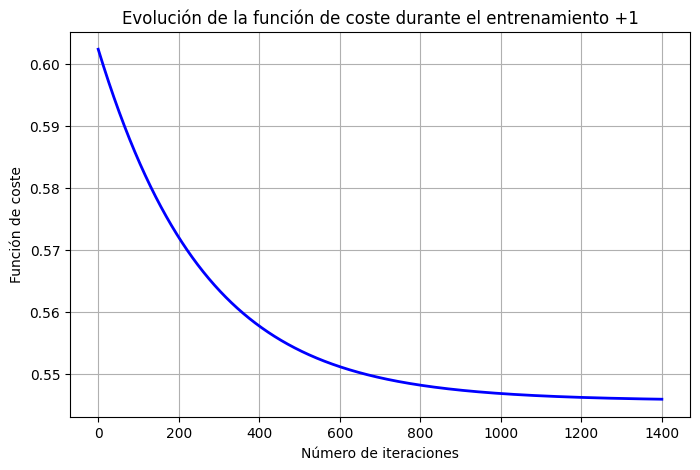

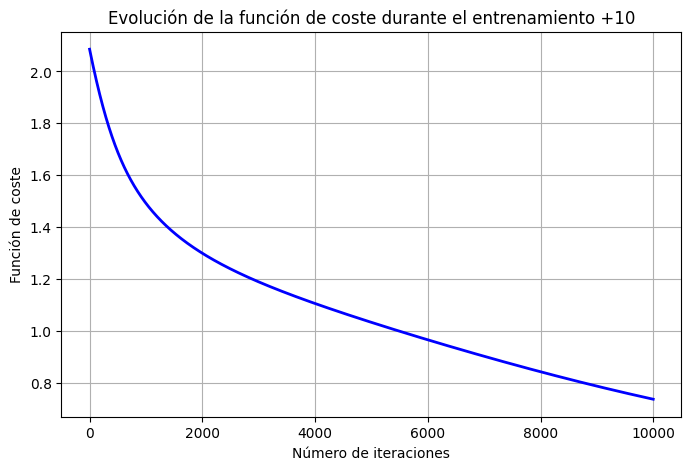

In [13]:
# Experimento 2

alpha = 0.01

Theta_verd_1 = np.random.random(n + 1)+ 1

Theta_verd_10 = np.random.random(n + 1) + 10


j_hist, Theta_verd_1 = gradient_descent_logistic(X_train, Y_train, Theta_verd_1, alpha, e=1e-6, iter_=10000)

print("Theta final:", Theta_verd_1)
print("Coste final:", j_hist[-1])


j_hist1, Theta_verd_10 = gradient_descent_logistic(X_train, Y_train, Theta_verd_10, alpha, e=1e-6, iter_=10000)

print("\nTheta final:", Theta_verd_10)
print("Coste final:", j_hist1[-1])

plt.figure(figsize=(8,5))
plt.plot(j_hist, color='blue', linewidth=2)
plt.xlabel("Número de iteraciones")
plt.ylabel("Función de coste")
plt.title("Evolución de la función de coste durante el entrenamiento +1")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(j_hist1, color='blue', linewidth=2)
plt.xlabel("Número de iteraciones")
plt.ylabel("Función de coste")
plt.title("Evolución de la función de coste durante el entrenamiento +10")
plt.grid(True)
plt.show()


## Evaluar el modelo sobre el subset de test

Finalmente, vamos a evaluar el modelo sobre un subset de datos que no hemos usado para entrenarlo.

Para ello, vamos a calcular el coste o error total sobre el subset de test y comprobar gráficamente los residuos sobre el mismo:

In [14]:
# TODO: Calcula el error del modelo sobre el subset de test usando la función de coste con la correspondientes theta
j_test = cost_function_logistic(X_test, Y_test, theta_final)
print("Coste en el subset de test:", j_test)

Coste en el subset de test: 0.5212999512315709


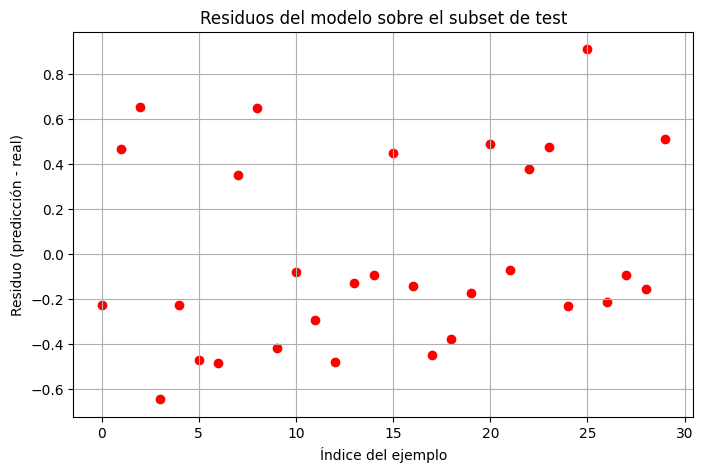

In [15]:
# TODO: Calcula las predicciones del modelo sobre el subset de test, calcula los residuos y represéntalos frente al índice de ejemplos (m)


z_test = np.matmul(X_test, theta_final)

# Recuerda usar la función sigmoide para transformar las predicciones
Y_test_pred = sigmoid(z_test)

residuos = Y_test_pred - Y_test.reshape(-1)

plt.figure(figsize=(8,5))
plt.scatter(range(len(residuos)), residuos, color='red')
plt.xlabel('Índice del ejemplo')
plt.ylabel('Residuo (predicción - real)')
plt.title('Residuos del modelo sobre el subset de test')
plt.grid(True)
plt.show()